In [13]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
words = open('./names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [15]:
len(words)

32033

In [16]:
chars = sorted(list(set(''.join(words))))
stoi= {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [17]:
block_size = 3

X,Y = [],[]
for w in words:
    # print(w)
    context = [0] * block_size
    for c in w + '.':
        ix = stoi[c]
        X.append(context)
        Y.append(ix)
        #print(''.join([itos[i] for i in context]),'------>', itos[ix])
        context = context[1:] + [ix] # crop and add

X = torch.tensor(X)
Y = torch.tensor(Y)

In [18]:
X.shape, X.dtype , Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [19]:
def build_dataset(words):
    block_size = 3
    X,Y = [],[]
    for w in words:
    # print(w)
        context = [0] * block_size
        for c in w + '.':
            ix = stoi[c]
            X.append(context)
            Y.append(ix)
            # print(''.join([itos[i] for i in context]),'------>', itos[ix])
            context = context[1:] + [ix] # crop and add

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte , Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [20]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [21]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)

W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)

W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)

paramaters = [C, W1, b1, W2, b2]

In [22]:
sum(p.nelement() for p in paramaters) # number of paramaters

11897

In [23]:
for p in paramaters:
    p.requires_grad = True

In [24]:
lossi = []
stepi = []

In [25]:
for i in range(300_000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))


    # forward pass
    emb= C[Xtr[ix]] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27

    loss = F.cross_entropy(logits, Ytr[ix])


    # backward pass
    for p in paramaters:
        p.grad = None
    
    loss.backward()

    # update paramaters
    lr = 0.1 if i < 150_000 else 0.01 

    for p in paramaters:
        p.data += -lr * p.grad


    stepi.append(i)
    lossi.append(loss.log10().item())



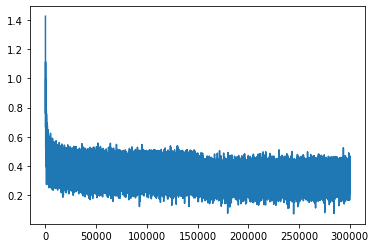

In [26]:
plt.plot(stepi, lossi)

In [27]:
emb= C[Xtr] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27


loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1094, grad_fn=<NllLossBackward0>)

In [28]:
emb= C[Xdev] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27


loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1575, grad_fn=<NllLossBackward0>)

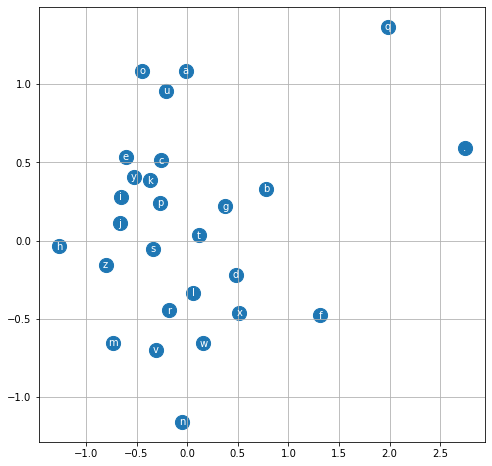

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i],  ha='center', va='center', color='white')
plt.grid('minor')

In [30]:
# sampling 

g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    context = [0] * block_size # initalize with ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

dexze.
loganuraileighah.
melliston.
anmeka.
kaman.
arselinabeltahiyanton.
moziella.
kinzited.
akariyah.
sadeu.
niaviyn.
ratlyn.
huniten.
tahlyn.
dashra.
aneil.
pen.
aisan.
jarienneko.
kayden.
